What makes a youtuber a great youtuber
Github:Noah123121


In [352]:
import numpy as np
import pandas as pd
import json
from scipy.optimize import curve_fit
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [353]:
youtube_df = pd.read_csv('USvideos.csv')
youtube_df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [354]:
youtube_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [355]:
id_dict = {}

with open('US_category_id.json') as file:
    data = json.load(file)
    for category in data['items']:
        id_dict[int(category['id'])] = category['snippet']['title']

youtube_df['category_id'] = youtube_df['category_id'].map(id_dict)

In [356]:
youtube = youtube_df[['video_id','title', 'channel_title', 'category_id','views', 'likes', 'dislikes']]

Text(0, 0.5, 'Categories')

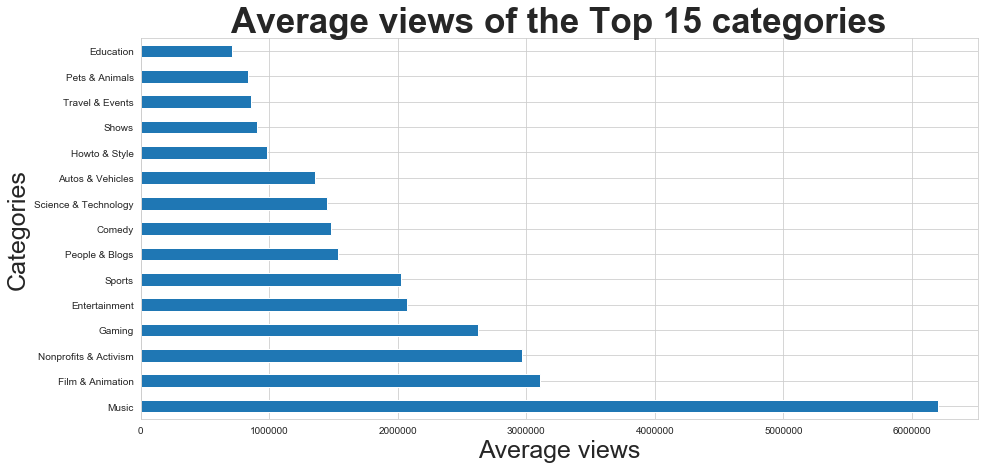

In [357]:
fig, ax = plt.subplots(figsize=(15,7))
average_views = youtube.groupby('category_id')['views'].mean().sort_values(ascending=False).head(15)
average_views.plot.barh()
plt.title('Average views of the Top 15 categories', fontsize=35, fontweight='bold')
plt.xlabel('Average views', fontsize=25)
plt.ylabel('Categories', fontsize=25)

In [ ]:
#Title: Sorting columns by their mean value
#Author: Andy Hayden
#Date: 2013
#Code version: 2.0
#Availability: https://stackoverflow.com/questions/17712163/pandas-sorting-columns-by-their-mean-value

#Title: pandas.DataFrame.plot.barh
#Author: The pandas development team
#Date: 2020
#Code version: 2.0
#Availability: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

Text(0, 0.5, 'Categories')

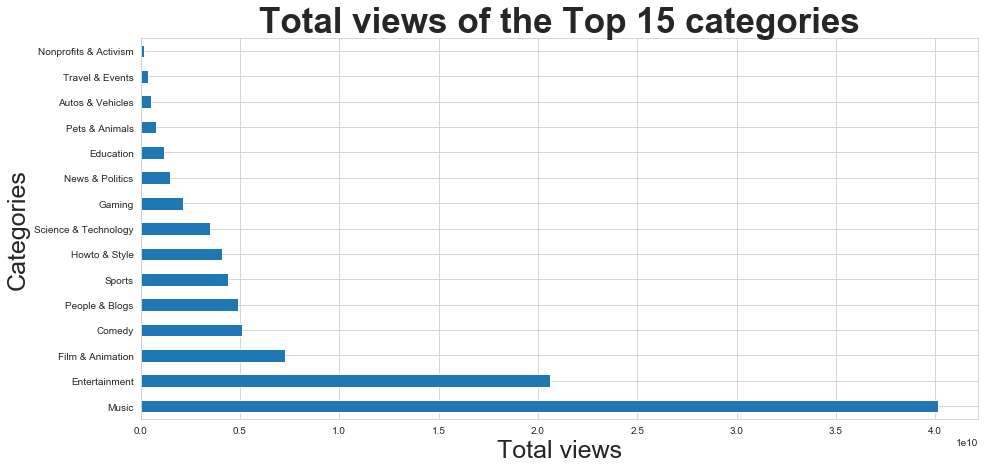

In [358]:
fig, ax = plt.subplots(figsize=(15,7))
total_views = youtube.groupby('category_id')['views'].sum().sort_values(ascending=False).head(15)
total_views.plot.barh()
plt.title('Total views of the Top 15 categories', fontsize=35, fontweight='bold')
plt.xlabel('Total views', fontsize=25)
plt.ylabel('Categories', fontsize=25)

In [ ]:
#Title: pandas groupby sort descending order
#Author: szeitlin
#Date: 2016
#Code version: 2.0
#Availability: https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order

#Title: pandas.DataFrame.plot.barh
#Author: The pandas development team
#Date: 2020
#Code version: 2.0
#Availability: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

In [359]:
us_videos = pd.read_csv('USvideos.csv')
us_videos_categories = pd.read_json('US_category_id.json')

In [360]:

categories = {category['id']: category['snippet']['title'] for category in us_videos_categories['items']}

us_videos.insert(4, 'category', us_videos['category_id'].astype(str).map(categories))

Text(0.5, 1.05, 'The Top 15 channels which have the most number of videos')

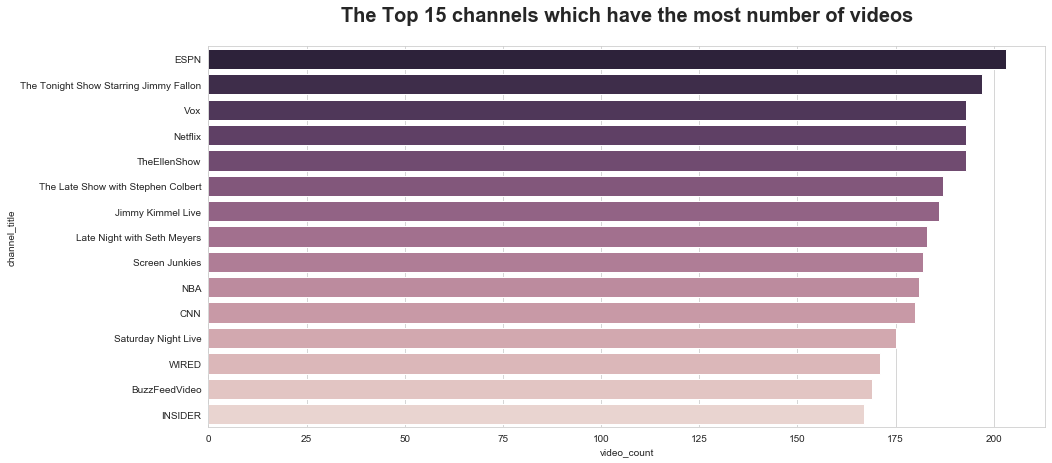

In [361]:
fig, ax = plt.subplots(figsize=(15,7))
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
   .sort_values("video_count", ascending=False).head(15)
colour=(0,0,0)
ax.set(xlabel="Number of videos", ylabel="Channels")
sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=15, reverse=True), ax=ax)

ax.set_title("The Top 15 channels which have the most number of videos", fontsize=20, fontweight='bold', y=1.05,)

In [ ]:
#Title: YouTube Trending Videos Analysis
#Author: Ammar Alyousfi
#Date: 2018
#Code version: 2.0
#Availability: https://notes.quantecon.org/submission/5bca753e95c6070015fa65ff

#Title: Choosing color palettes
#Author: Michael Waskom
#Date: 2020
#Code version: 2.0
#Availability: https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html

In [362]:
us_videos = pd.read_csv('USvideos.csv')
us_videos_categories = pd.read_json('US_category_id.json')
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date

publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour
us_videos_last = us_videos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
us_videos_first = us_videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)
us_videos_first["time_to_trend"] = (us_videos_first.trending_date - us_videos_first.publish_date) / np.timedelta64(1, 'D')

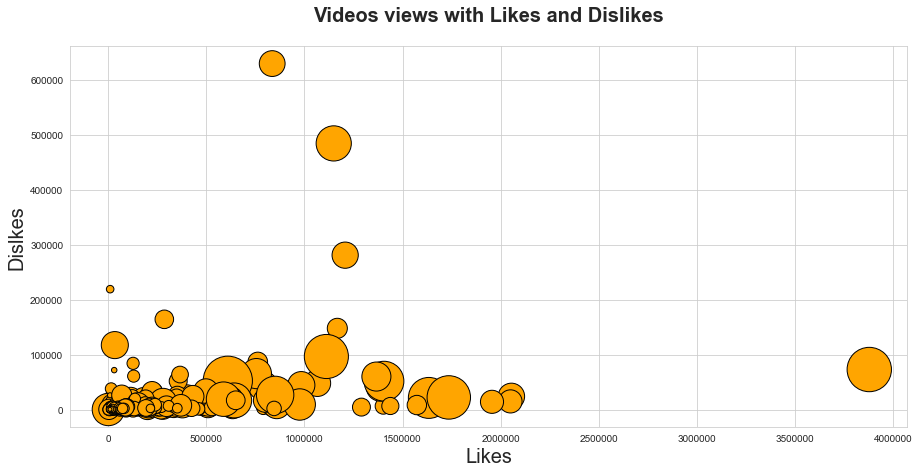

In [363]:
plt.figure(figsize=(15,7))
likes = us_videos_first["likes"].values
dislikes = us_videos_first["dislikes"].values
views = us_videos_first["views"].values
sns.set_style("whitegrid")
plt.xlabel('Likes', fontsize=20)
plt.ylabel('Dislkes', fontsize=20)
plt.title('Videos views with Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.scatter(likes, dislikes, s = views/20000, c='orange', edgecolors='black')
plt.show()

In [ ]:
#Title: YouTube Data Exploration and Plotly Visualization
#Author: SkalskiP
#Date: 2018
#Code version: 2.0
#Availability: https://www.kaggle.com/skalskip/youtube-data-exploration-and-plotly-visualization


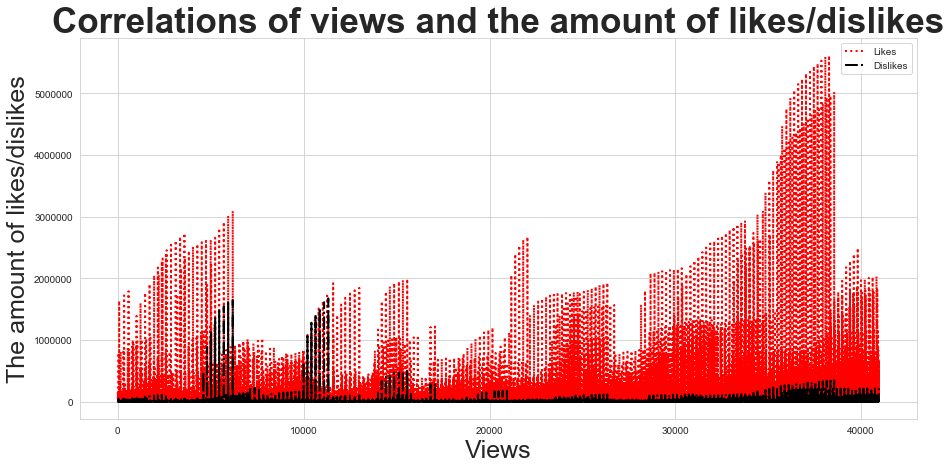

In [364]:
data = pd.read_csv('USvideos.csv')
plt.figure(figsize=(15,7))
data.likes.plot(kind='line',color='red',alpha=1,grid=True,linewidth=2,linestyle=':',label='Likes')
data.dislikes.plot(kind='line',color='black',alpha=1,grid=True,linewidth=2,linestyle='-.',label='Dislikes')
plt.legend(loc='upper right')     
plt.xlabel('Views', fontsize=25)              
plt.ylabel('The amount of likes/dislikes', fontsize=25)
plt.title('Correlations of views and the amount of likes/dislikes', fontsize=35, fontweight='bold')       
plt.show()

In [ ]:
#Title: matplotlib.axes.Axes.plot
#Author: The Matplotlib development team
#Date: 2020
#Code version: 2.0
#Availability: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html

Text(0.5, 1.0, 'Correlations of date and the activity level')

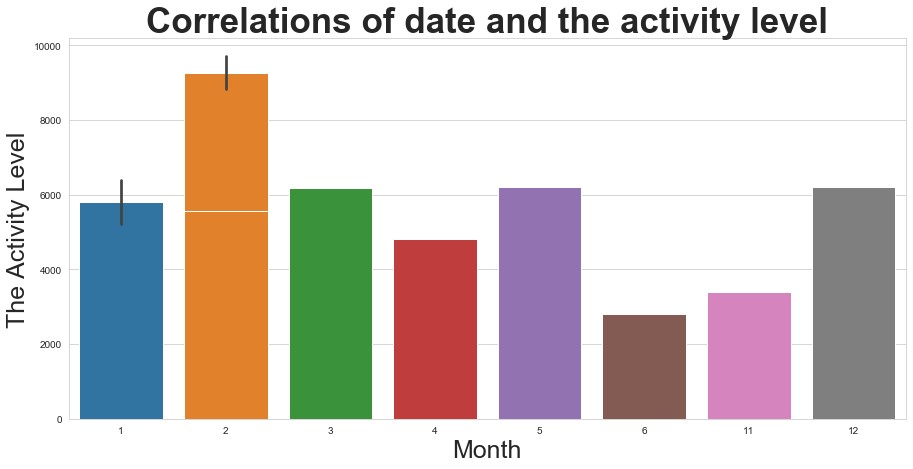

In [365]:
data=pd.read_csv("USvideos.csv")
data["trending_date"]=pd.to_datetime(data["trending_date"],format="%y.%d.%m")
data=data.assign(trending_day=data.trending_date.dt.day,trending_month=data.trending_date.dt.month,trending_year=data.trending_date.dt.year)

fig = plt.figure(figsize=(15,7))

sns.barplot(x=data["trending_year"],y=data["comment_count"])
data.groupby("trending_year")["likes","dislikes","views","comment_count"].mean()
sns.countplot(x=data["trending_month"],data=data)
plt.xlabel('Month', fontsize=25)              
plt.ylabel('The Activity Level', fontsize=25)
plt.title('Correlations of date and the activity level', fontsize=35, fontweight='bold')    


In [ ]:
#Title: using pd.to_datetime to form a date by taking input of year,months,day present in different columns in a data frame
#Author: Sas_learner
#Date: 2018
#Code version: 2.0
#Availability: https://stackoverflow.com/questions/53810465/using-pd-to-datetime-to-form-a-date-by-taking-input-of-year-months-day-present-i

In [366]:
us_videos['dislike_percentage'] = us_videos['dislikes'] / (us_videos['dislikes'] + us_videos['likes'])

In [367]:
us_videos_last = us_videos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
us_videos_first = us_videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

In [368]:
us_videos['likes_log'] = np.log(us_videos['likes'] + 1)
us_videos['views_log'] = np.log(us_videos['views'] + 1)
us_videos['dislikes_log'] = np.log(us_videos['dislikes'] + 1)
us_videos['comment_log'] = np.log(us_videos['comment_count'] + 1)

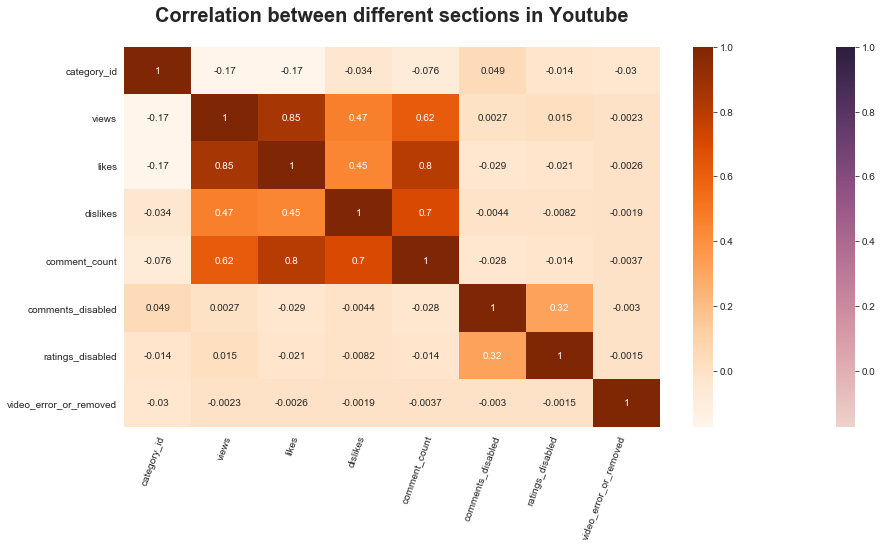

In [369]:
fig, ax = plt.subplots(figsize=(15,7))
df = pd.read_csv("USvideos.csv")
df.corr()
h_labels = [x.title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]
plt.setp(ax.get_xticklabels(), rotation=70, ha="right",
         rotation_mode="anchor")
ax.set_title("Correlation between different sections in Youtube", fontsize=20, fontweight='bold', y=1.05,)
sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
heat_map = sns.heatmap(df.corr(), cmap="Oranges")

In [ ]:
#Title: YouTube Trending Videos Analysis
#Author: Ammar Alyousfi
#Date: 2020
#Code version: 2.0
#Availability: https://www.kaggle.com/ammar111/youtube-trending-videos-analysis/notebook

In [370]:
us_videos=pd.read_csv("USvideos.csv")
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date

publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour

In [371]:
us_videos_first["time_to_trend"] = (us_videos_first.trending_date - us_videos_first.publish_date) / np.timedelta64(1, 'D')

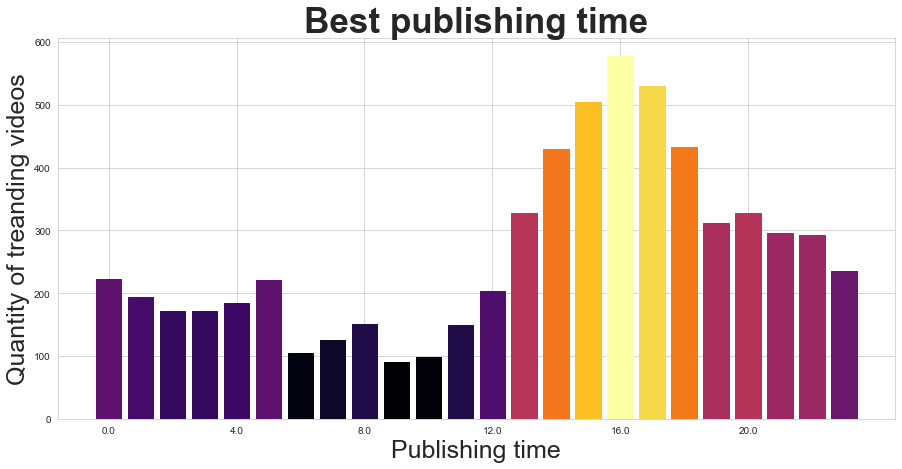

In [372]:
fig = plt.figure(figsize=(15,7))
publish_s = [0] * 24
for index, row in us_videos_first.iterrows():
    publish_s[row["publish_hour"]] += 1
    
values = publish_s
ind = np.arange(len(values))

ax = fig.add_subplot(111)
bars = ax.bar(ind, values)
for i, b in enumerate(bars):
    b.set_color(plt.cm.inferno((values[i] - min(values))/(max(values)- min(values))))

plt.ylabel('Quantity of treanding videos', fontsize=25)
plt.xlabel('Publishing time', fontsize=25)
plt.title('Best publishing time', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0.00, 4.00, 8.00, 12.00, 16.00, 20.00])

plt.show()

In [ ]:
#Title: YouTube Data Exploration and Plotly Visualization
#Author: SkalskiP
#Date: 2018
#Code version: 2.0
#Availability: https://www.kaggle.com/skalskip/youtube-data-exploration-and-plotly-visualization

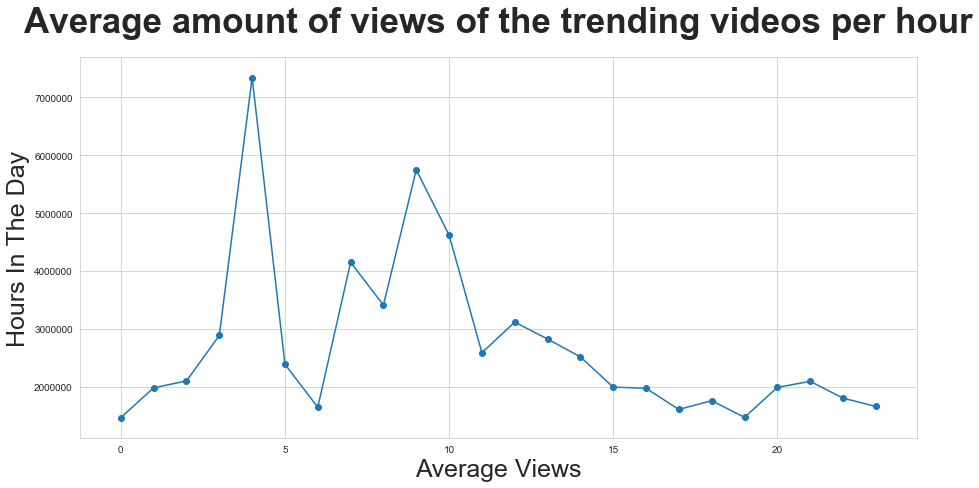

In [373]:
fig, ax = plt.subplots(figsize=(15,7))
youtube = pd.read_csv("USvideos.csv")

youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%y.%d.%m') 
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube['category_id'] = youtube['category_id'].astype(str)

youtube.head()

youtube["hour"] = youtube['publish_time'].dt.hour
by_hour = youtube.groupby("hour").mean()

plt.plot(by_hour.index.values, by_hour["views"])
plt.scatter(by_hour.index.values, by_hour["views"])
plt.ylabel('Hours In The Day', fontsize=25)
plt.xlabel('Average Views', fontsize=25)
plt.title("Average amount of views of the trending videos per hour", fontsize=35, fontweight='bold', y=1.05)
plt.show()

In [ ]:
#Title: Using a Pandas dataframe index as values for x-axis in matplotlib plot
#Author: Jason
#Date: 2014
#Code version: 2.0
#Availability: https://stackoverflow.com/questions/22356881/using-a-pandas-dataframe-index-as-values-for-x-axis-in-matplotlib-plot

Text(0.5, 1.05, 'Correlations of The Length Of The Title and Popularity')

<Figure size 1440x720 with 0 Axes>

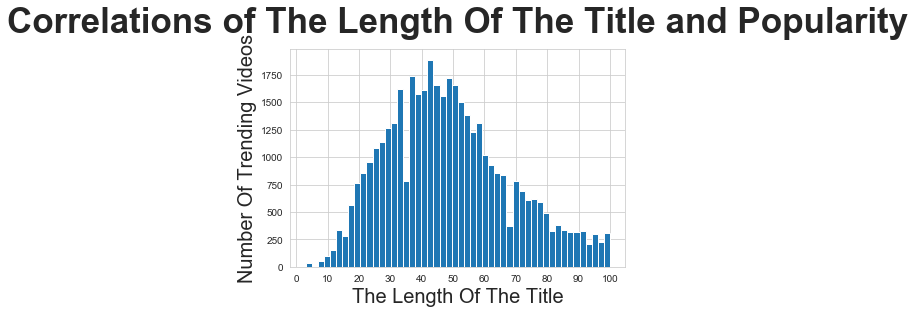

In [374]:
plt.figure(figsize=(20,10))
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="The Length Of The Title", ylabel="The Number Of The Trending Videos", xticks=range(0, 110, 10))
plt.xlabel('The Length Of The Title', fontsize=20)
plt.ylabel('Number Of Trending Videos', fontsize=20)
plt.title('Correlations of The Length Of The Title and Popularity', fontsize=35, fontweight='bold', y=1.05,)

In [ ]:
#Title: YouTube Trending Videos Analysis
#Author: Ammar Alyousfi
#Date: 2020
#Code version: 2.0
#Availability: https://www.kaggle.com/ammar111/youtube-trending-videos-analysis/notebook

In [375]:
youtube = pd.read_csv("USvideos.csv")
trend = youtube.copy()
fig = plt.figure(figsize=(15,7))
trend['trending_date'] = pd.to_datetime(trend['trending_date'], format='%y.%d.%m')
trend['publish_time'] = pd.to_datetime(trend['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

trend['publish_date'] = trend['publish_time'].dt.date
trend['publish_wd'] = trend['publish_time'].dt.weekday
trend['publish_hr'] = trend['publish_time'].dt.hour
trend['publish_time'] = trend['publish_time'].dt.time

data_bar = trend['publish_wd'].map(dict(zip(range(7),
        ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']))).value_counts()

fig = go.Figure(data=[go.Bar(
            x=data_bar.index.values, y=data_bar,
            textposition='auto',
        )])
fig.update_layout(title = "Amount Of Videos That Are Published Everyday",yaxis=dict(
            title='Videos'))

fig.show()

<Figure size 1080x504 with 0 Axes>